In [1]:
import imageio
import glob
import numpy as np
import matplotlib.pyplot as plt

In [35]:
method = "ratio_nf-v"
ni = 300

In [36]:
imgs = np.zeros((ni, 1024, 1024))
costs = np.zeros((ni, 1024, 1024))

for i, im_path in enumerate(glob.glob(f"{method}/*.png")):
    if (i>=ni):
        break
    im = imageio.imread(im_path)
    c = im[: ,:, 1] / 255
    im = im[:, :, 0] / 255
    imgs[i] = im
    costs[i] = c
    
   
mean_img = np.mean(imgs, axis=0)

In [22]:
mean_img.shape

(1024, 1024)

In [23]:
vim = np.var(imgs, axis=0)
vim.shape

(1024, 1024)

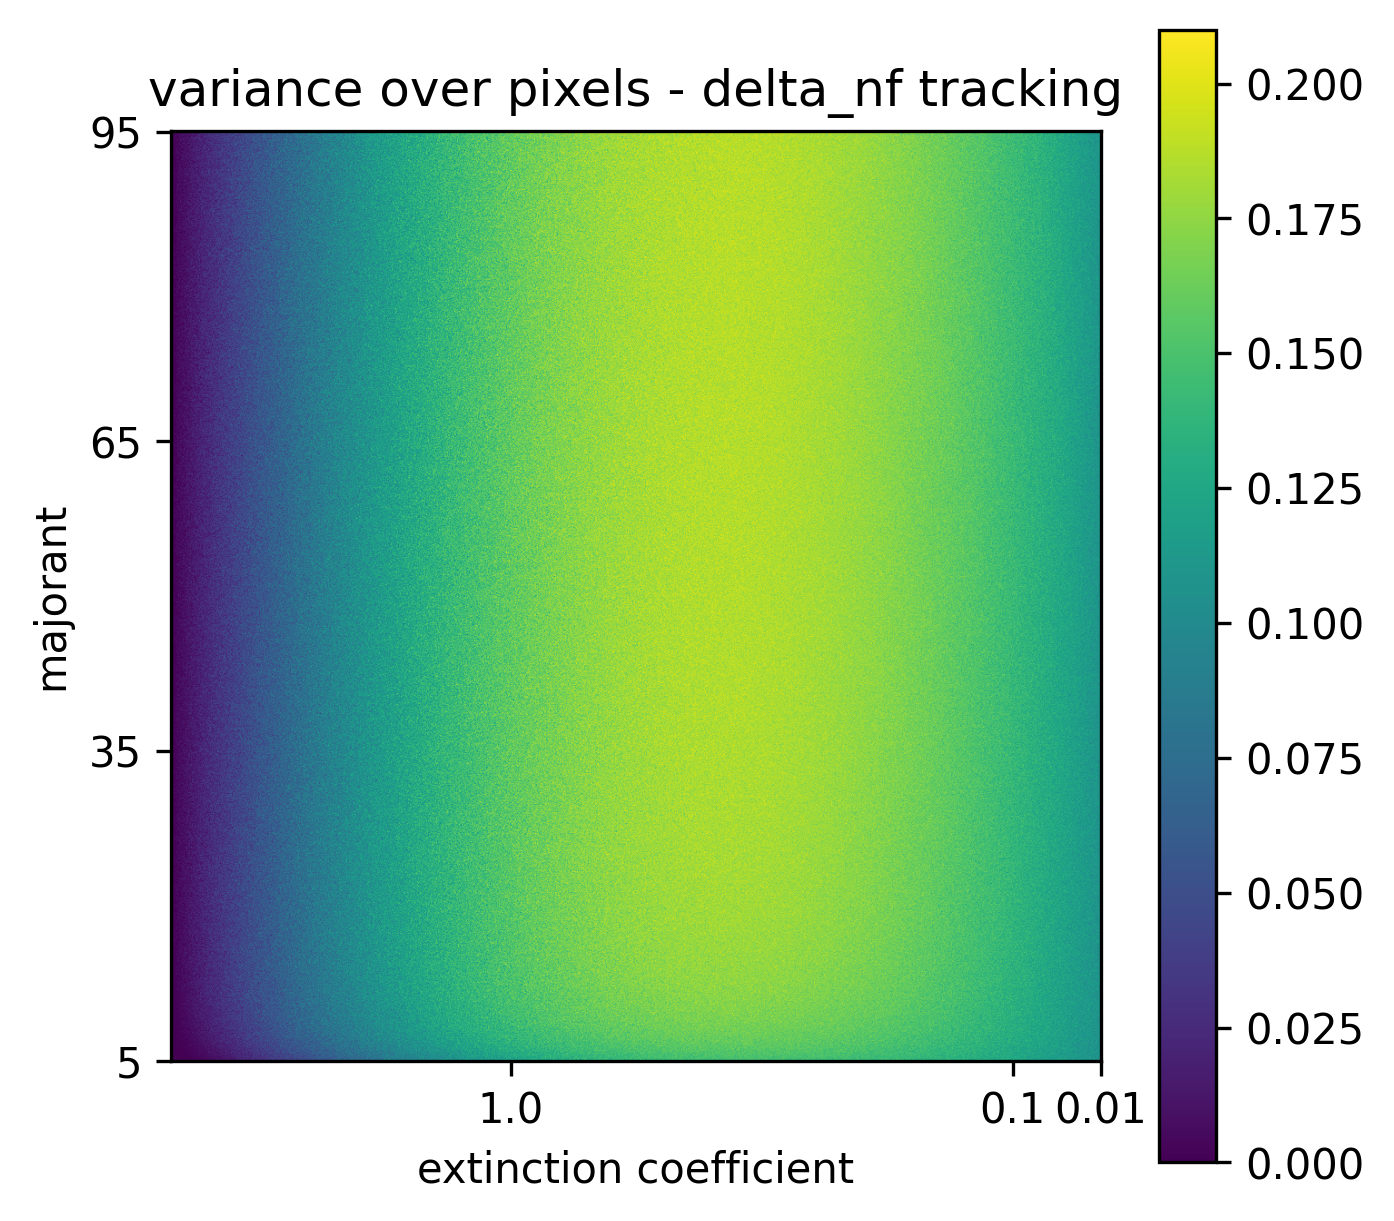

In [24]:
plt.figure(figsize=(5, 5), facecolor="white", dpi=300)
plt.imshow(vim)
plt.xlabel("extinction coefficient")
plt.ylabel("majorant")

tsy = [   0.,   341.3,   682.7,  1024.]
lbly = [95, 65, 35, 5]
#print(tsy)
plt.yticks(ticks=tsy, labels=lbly)

tsx = [373.8, 926.7, 1024]
lblx = [1.0, 0.10, 0.01]

plt.xticks(ticks=tsx, labels=lblx)
plt.colorbar()
#plt.xscale("log")
plt.title(f"variance over pixels - {method} tracking")
plt.savefig(f"plots/variance-img-{method}")

(1024, 1024)


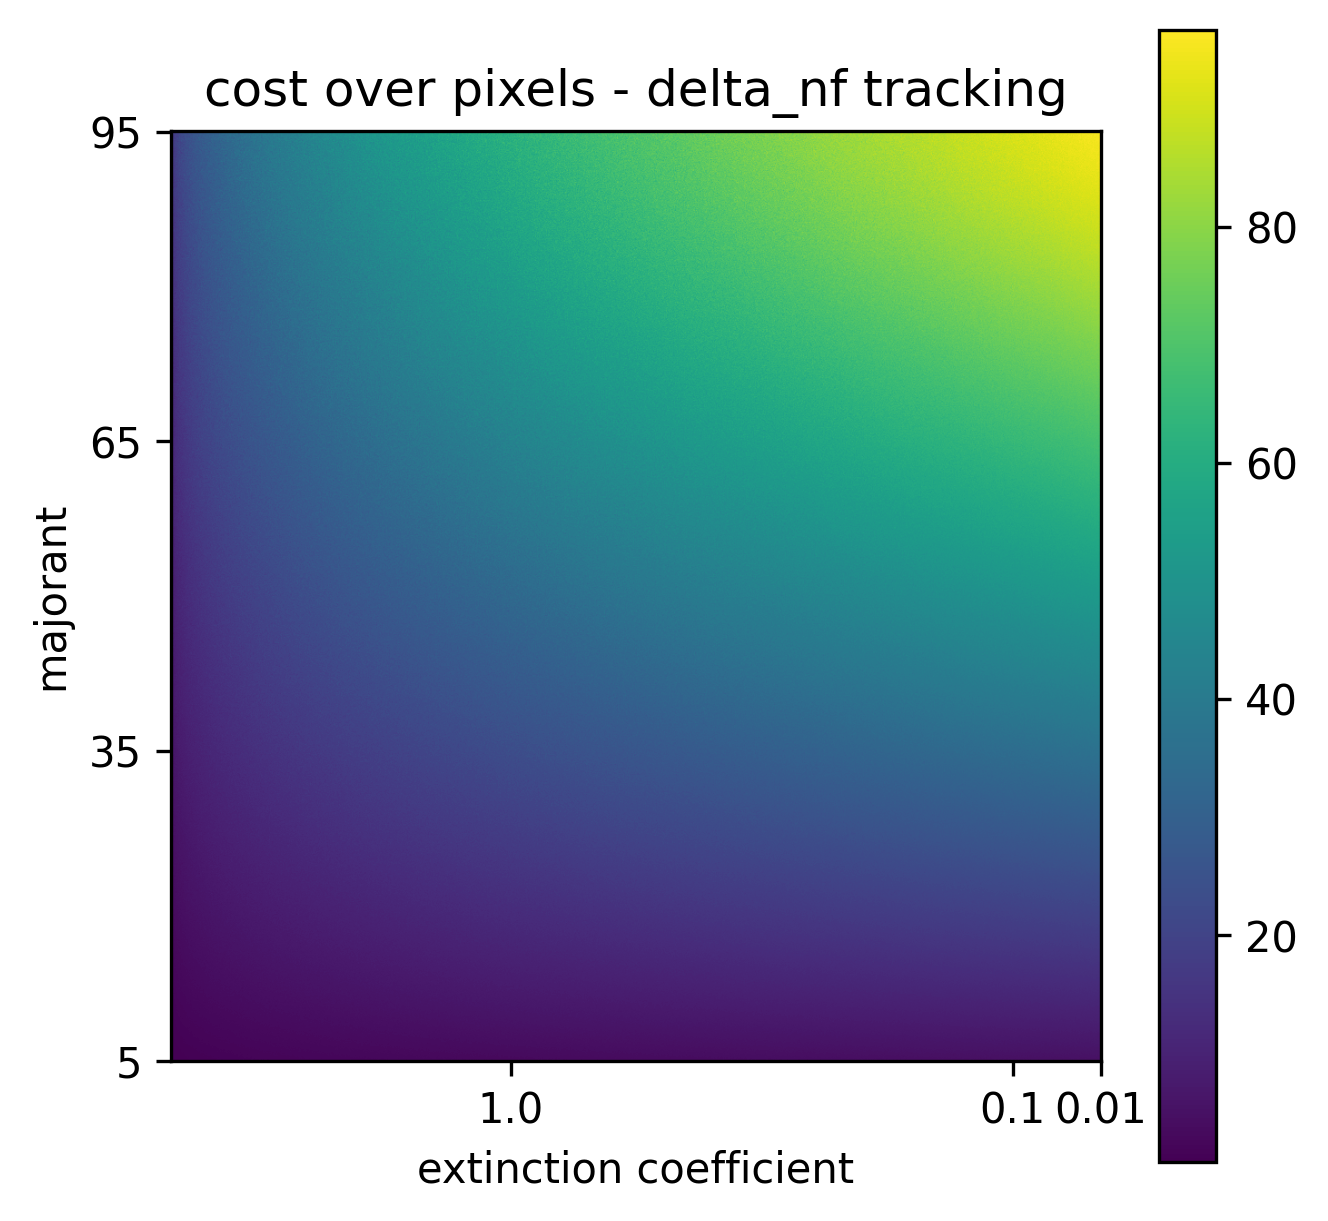

In [25]:
cs = np.mean(costs*100, axis=0)
print(cs.shape)
plt.figure(figsize=(5, 5), facecolor="white", dpi=300)
plt.imshow(cs)
plt.colorbar()

plt.xlabel("extinction coefficient")
plt.ylabel("majorant")

tsy = [   0.,   341.3,   682.7,  1024.]
lbly = [95, 65, 35, 5]
#print(tsy)
plt.yticks(ticks=tsy, labels=lbly)

tsx = [373.8, 926.7, 1024]
lblx = [1.0, 0.10, 0.01]

plt.xticks(ticks=tsx, labels=lblx)
#plt.xscale("log")
plt.title(f"cost over pixels - {method} tracking")
plt.savefig(f"plots/cost-img-{method}")


In [308]:
### other 

In [ ]:
var = []
#mean_img = np.zeros((1024, 1024))
for i in range(0, len(imgs), 10):
    vv = np.sum(imgs[:(i+1)], axis=0)/(i+1)
    v = np.var(vv)
    #mean_img += imgs[i]
    #diff = imgs[:(i+1)] - mean_img
    #print(diff.shape)
    #v = 1/(i+1) * np.sum((diff)**2)
    var.append(v) 
    #print(v)

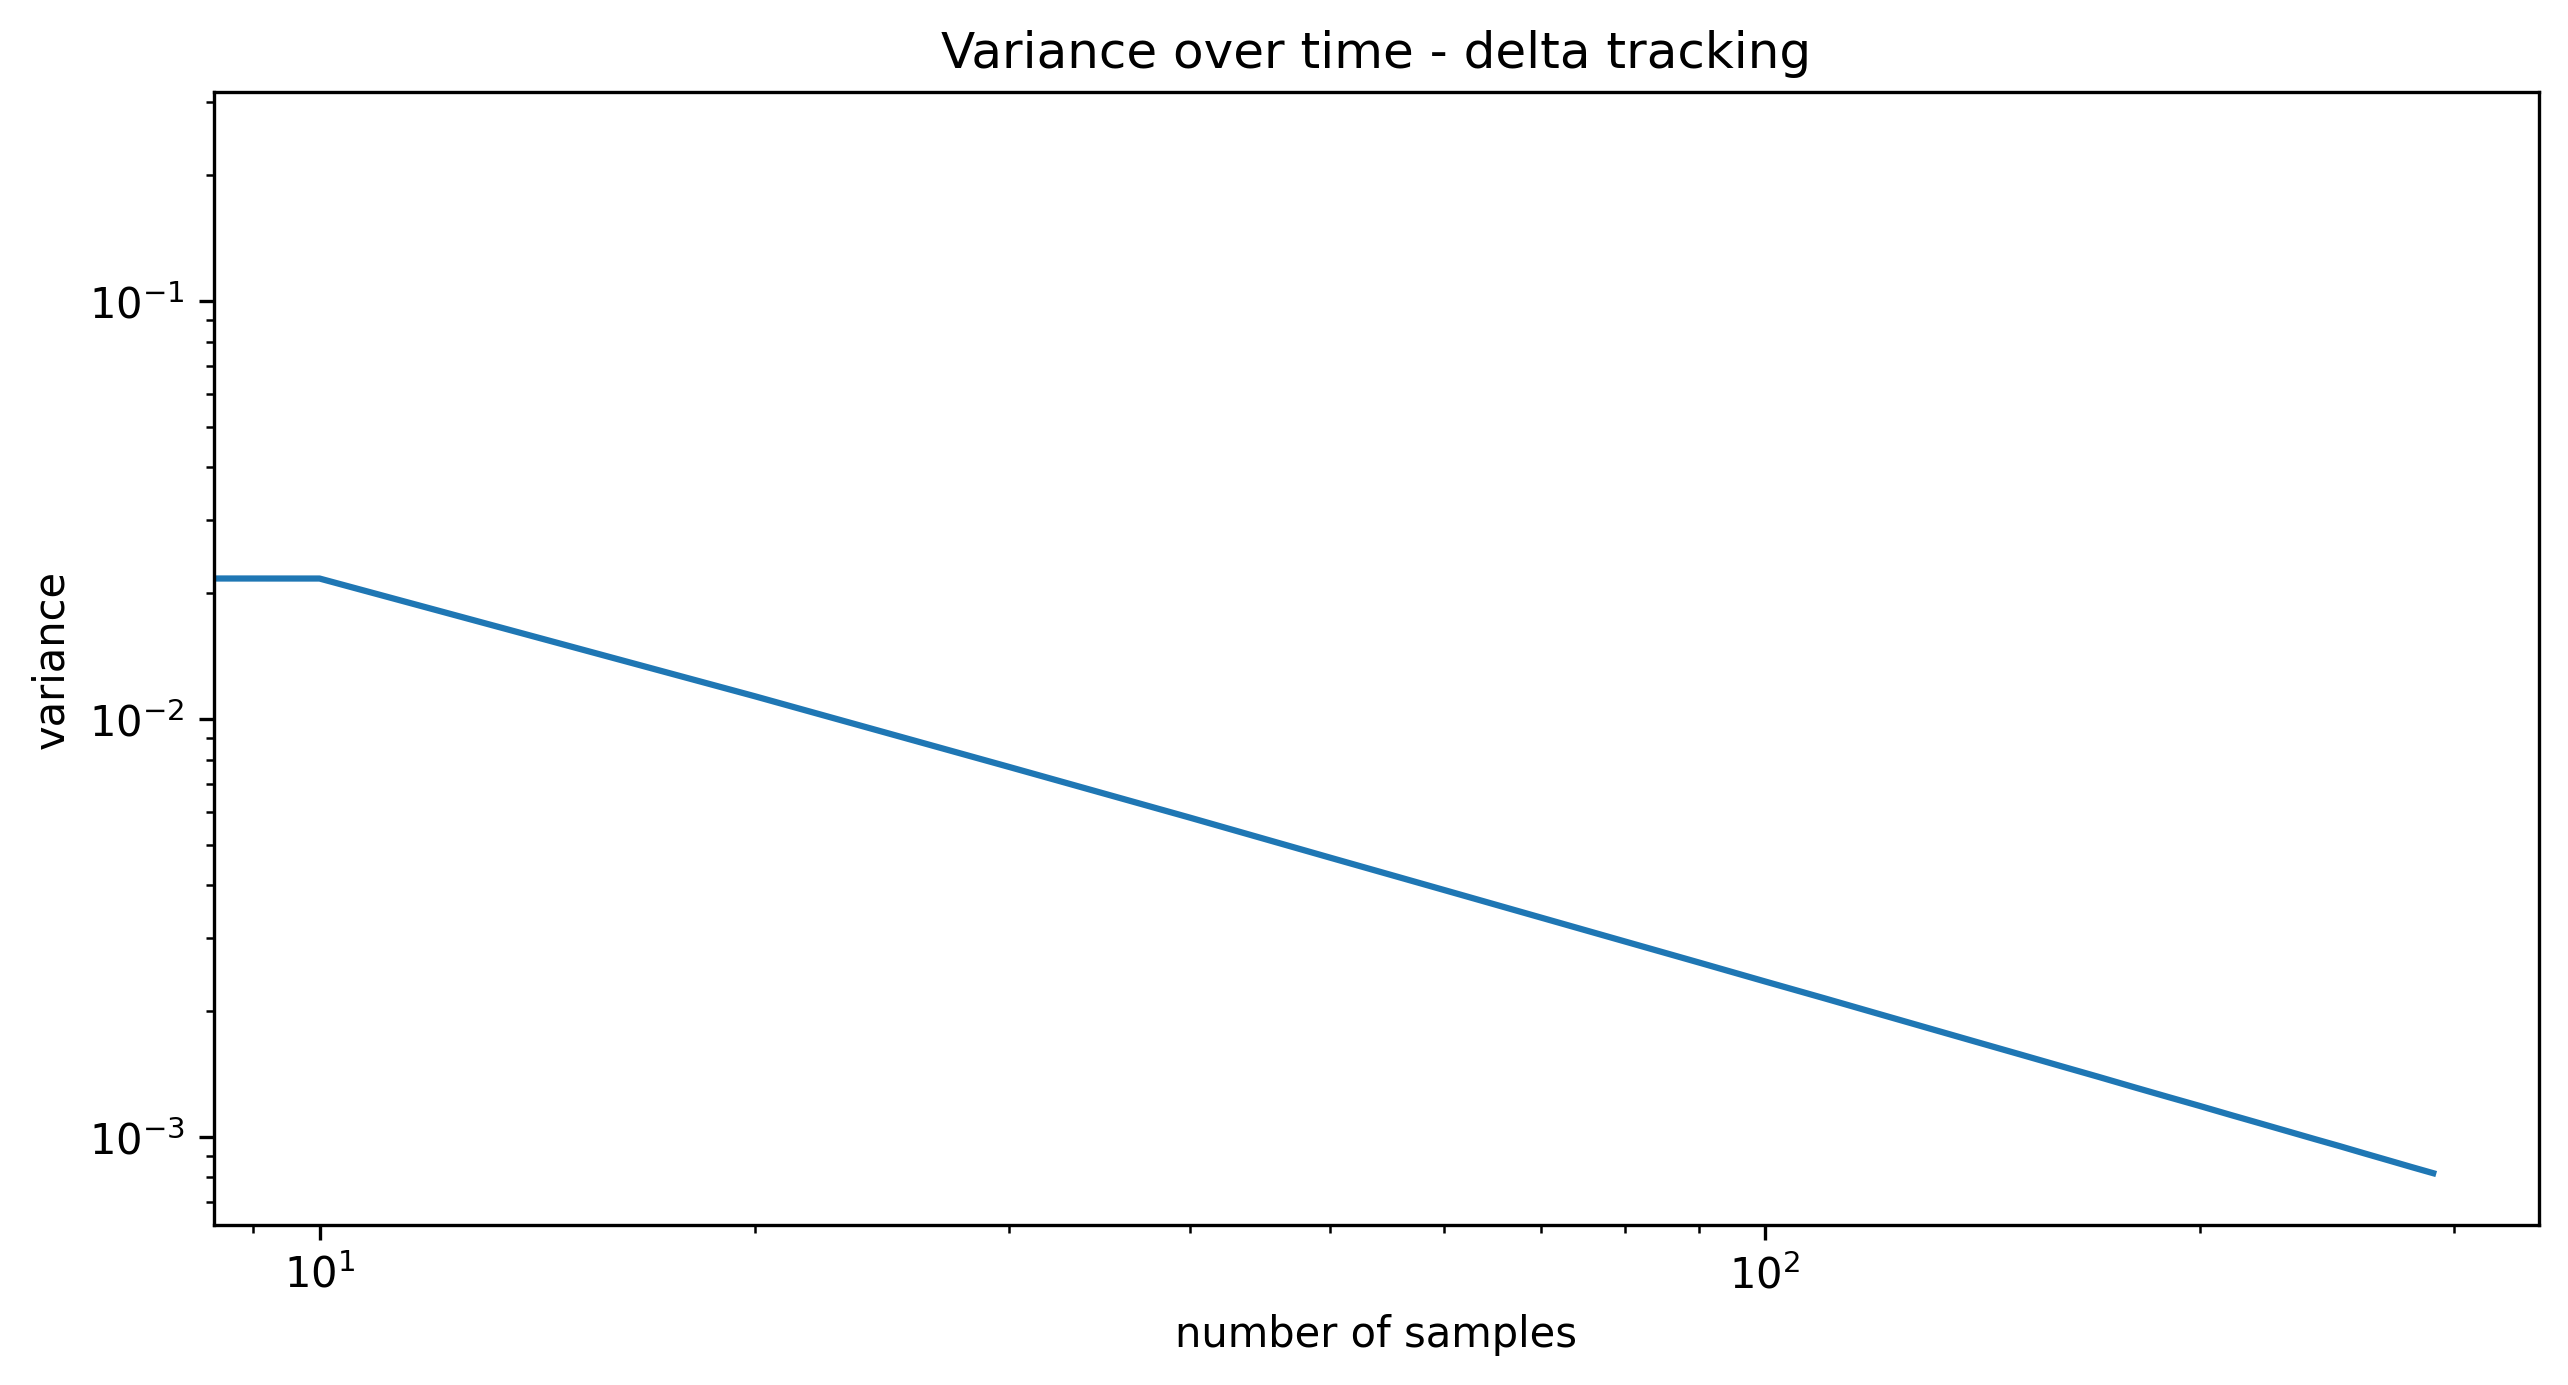

In [ ]:
plt.figure(figsize=(10,5), facecolor="white", dpi=300)
plt.plot(np.arange(0, 10*len(var), 10), var)
plt.xlabel("number of samples")
plt.ylabel("variance")
plt.title(f"Variance over time - {method.strip('-v')} tracking")
plt.xscale("log")
plt.yscale("log")
plt.savefig(f"plots/variance-{method}")

(-0.5, 1023.5, 1023.5, -0.5)

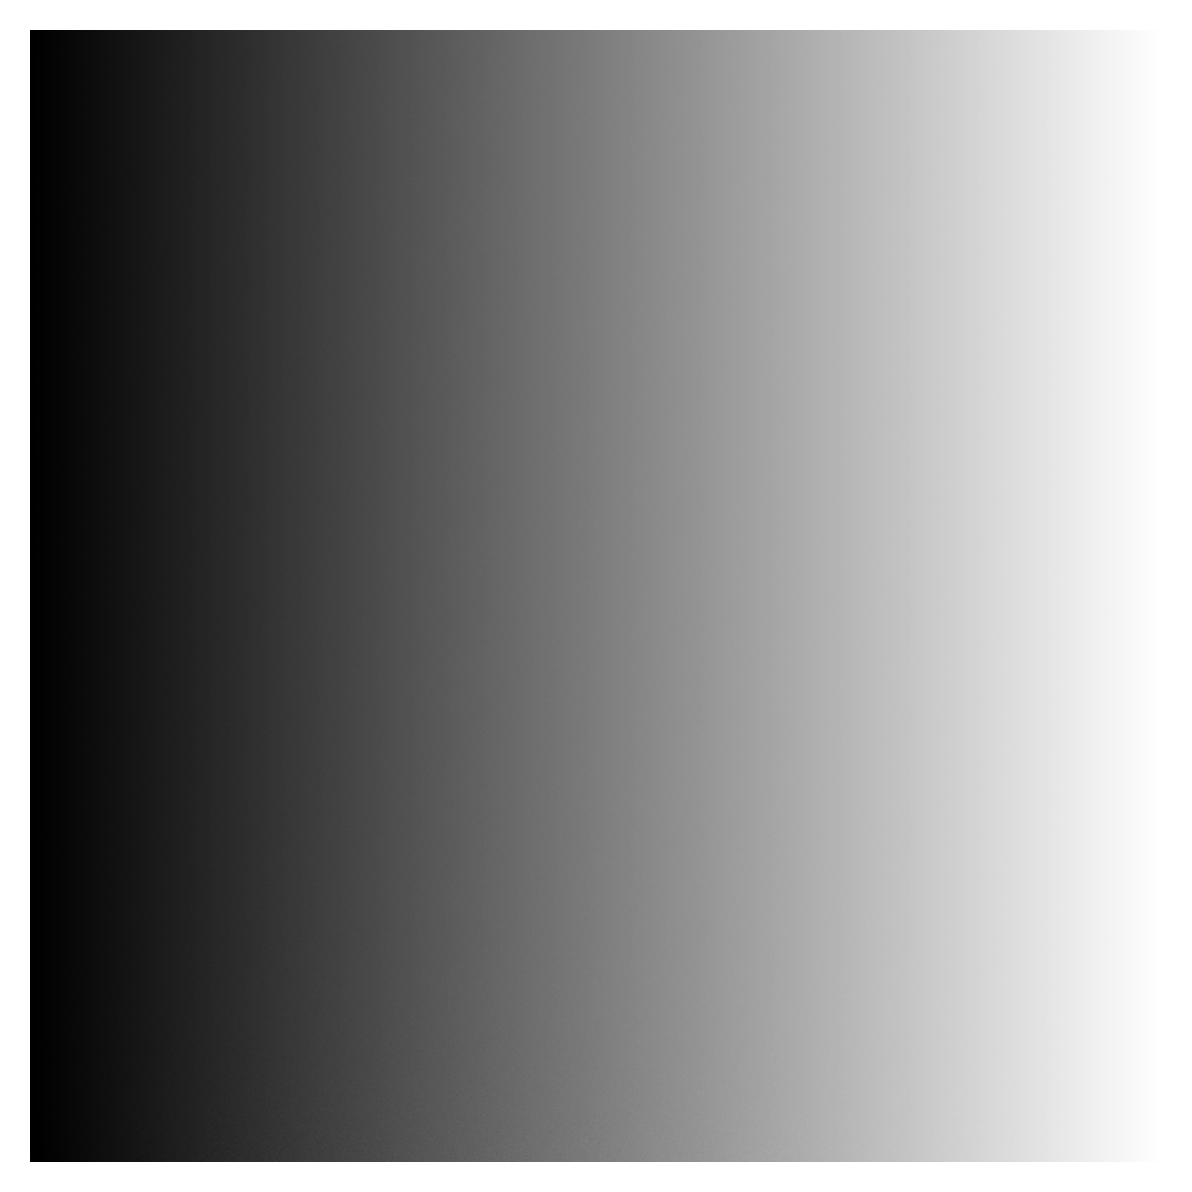

In [311]:
plt.figure(figsize=(5, 5), dpi=300)
plt.imshow(mean_img, cmap="gray")
plt.axis("off")
#plt.savefig(f"plots/render-{method}.png")

### Analytical gradient image

In [312]:
og_im = imageio.imread("analytical/og.png")
og_im = og_im[:, :, 0] /255

(-0.5, 1023.5, 1023.5, -0.5)

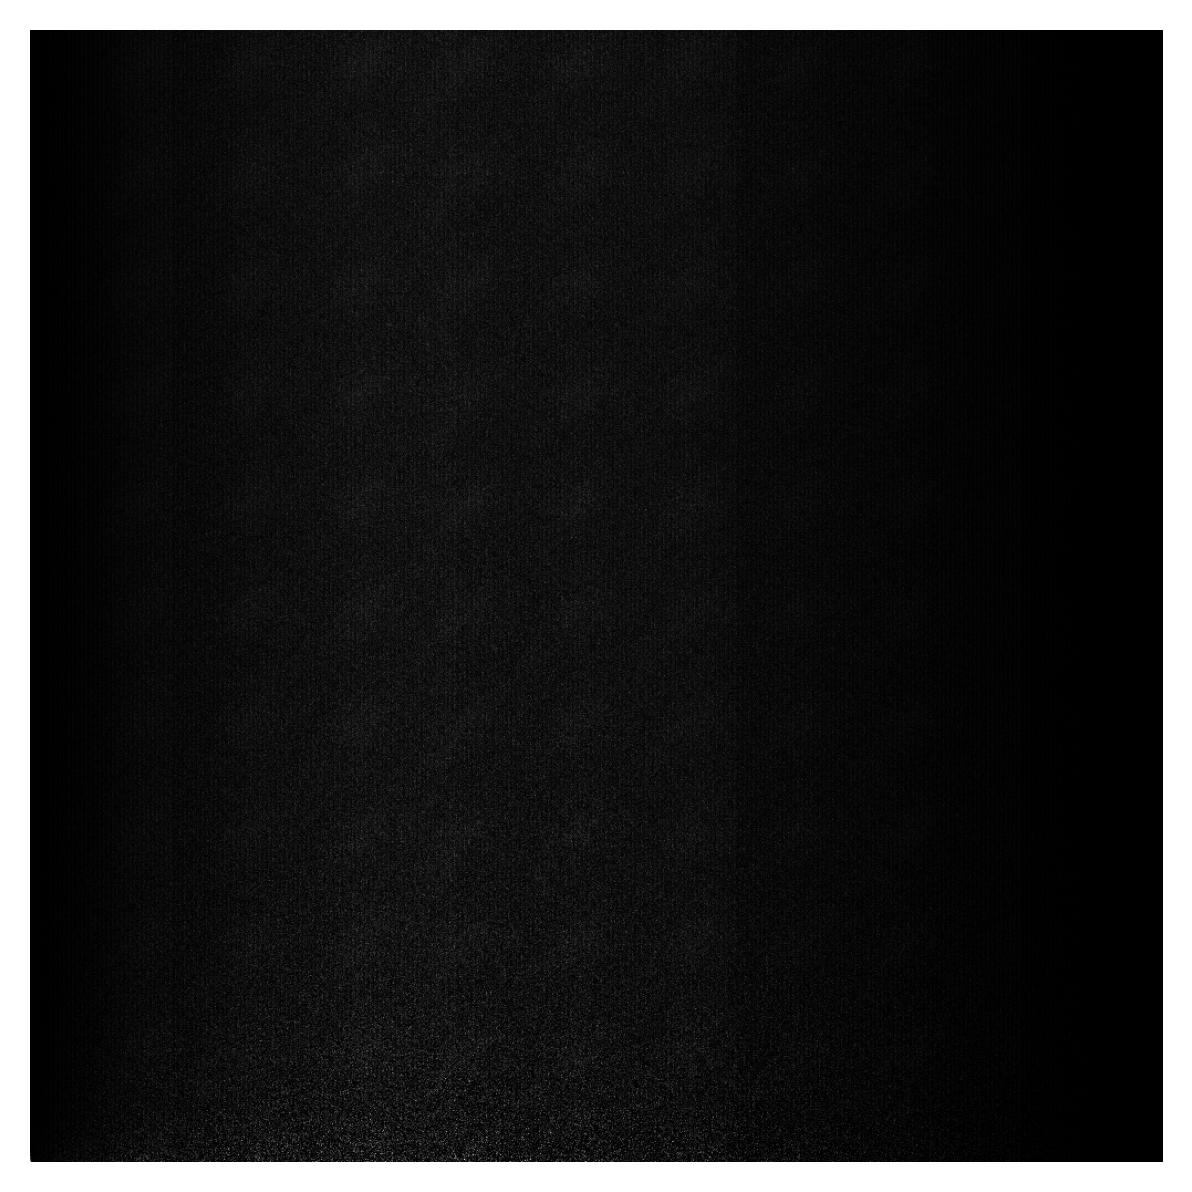

In [313]:
plt.figure(figsize=(5, 5), dpi=300)
plt.imshow((og_im-mean_img)**2, cmap="gray")
plt.axis("off")
#plt.savefig(f"plots/err-{method}.png")

### Analytical constant image

In [317]:
## error - use -v folder images
og_im = imageio.imread("analytical/err_0.png")
og_im = og_im[:, :, 0] /255

In [318]:
og_im

Array([[0.60784314, 0.60784314, 0.60784314, ..., 0.60784314, 0.60784314,
        0.60784314],
       [0.60784314, 0.60784314, 0.60784314, ..., 0.60784314, 0.60784314,
        0.60784314],
       [0.60784314, 0.60784314, 0.60784314, ..., 0.60784314, 0.60784314,
        0.60784314],
       ...,
       [0.60784314, 0.60784314, 0.60784314, ..., 0.60784314, 0.60784314,
        0.60784314],
       [0.60784314, 0.60784314, 0.60784314, ..., 0.60784314, 0.60784314,
        0.60784314],
       [0.60784314, 0.60784314, 0.60784314, ..., 0.60784314, 0.60784314,
        0.60784314]])

(-0.5, 1023.5, 1023.5, -0.5)

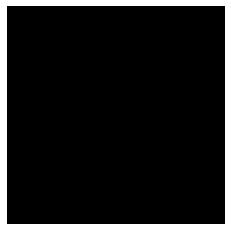

In [319]:
#plt.figure(figsize=(5, 5), dpi=300)
plt.imshow(og_im, cmap="gray")
plt.axis("off")
#plt.savefig("plots/analytical.png")

## RMSE error

og_im is analytical version

In [315]:
errs = []
img = np.zeros((1024, 1024))
for i in range(imgs.shape[0]):
    img += imgs[i]
    err = np.sqrt(np.mean((img/(i+1) - og_im)**2))
    errs.append(err)

print(errs[0])
errs[-1]

0.047412149578994624


0.009810199707700602

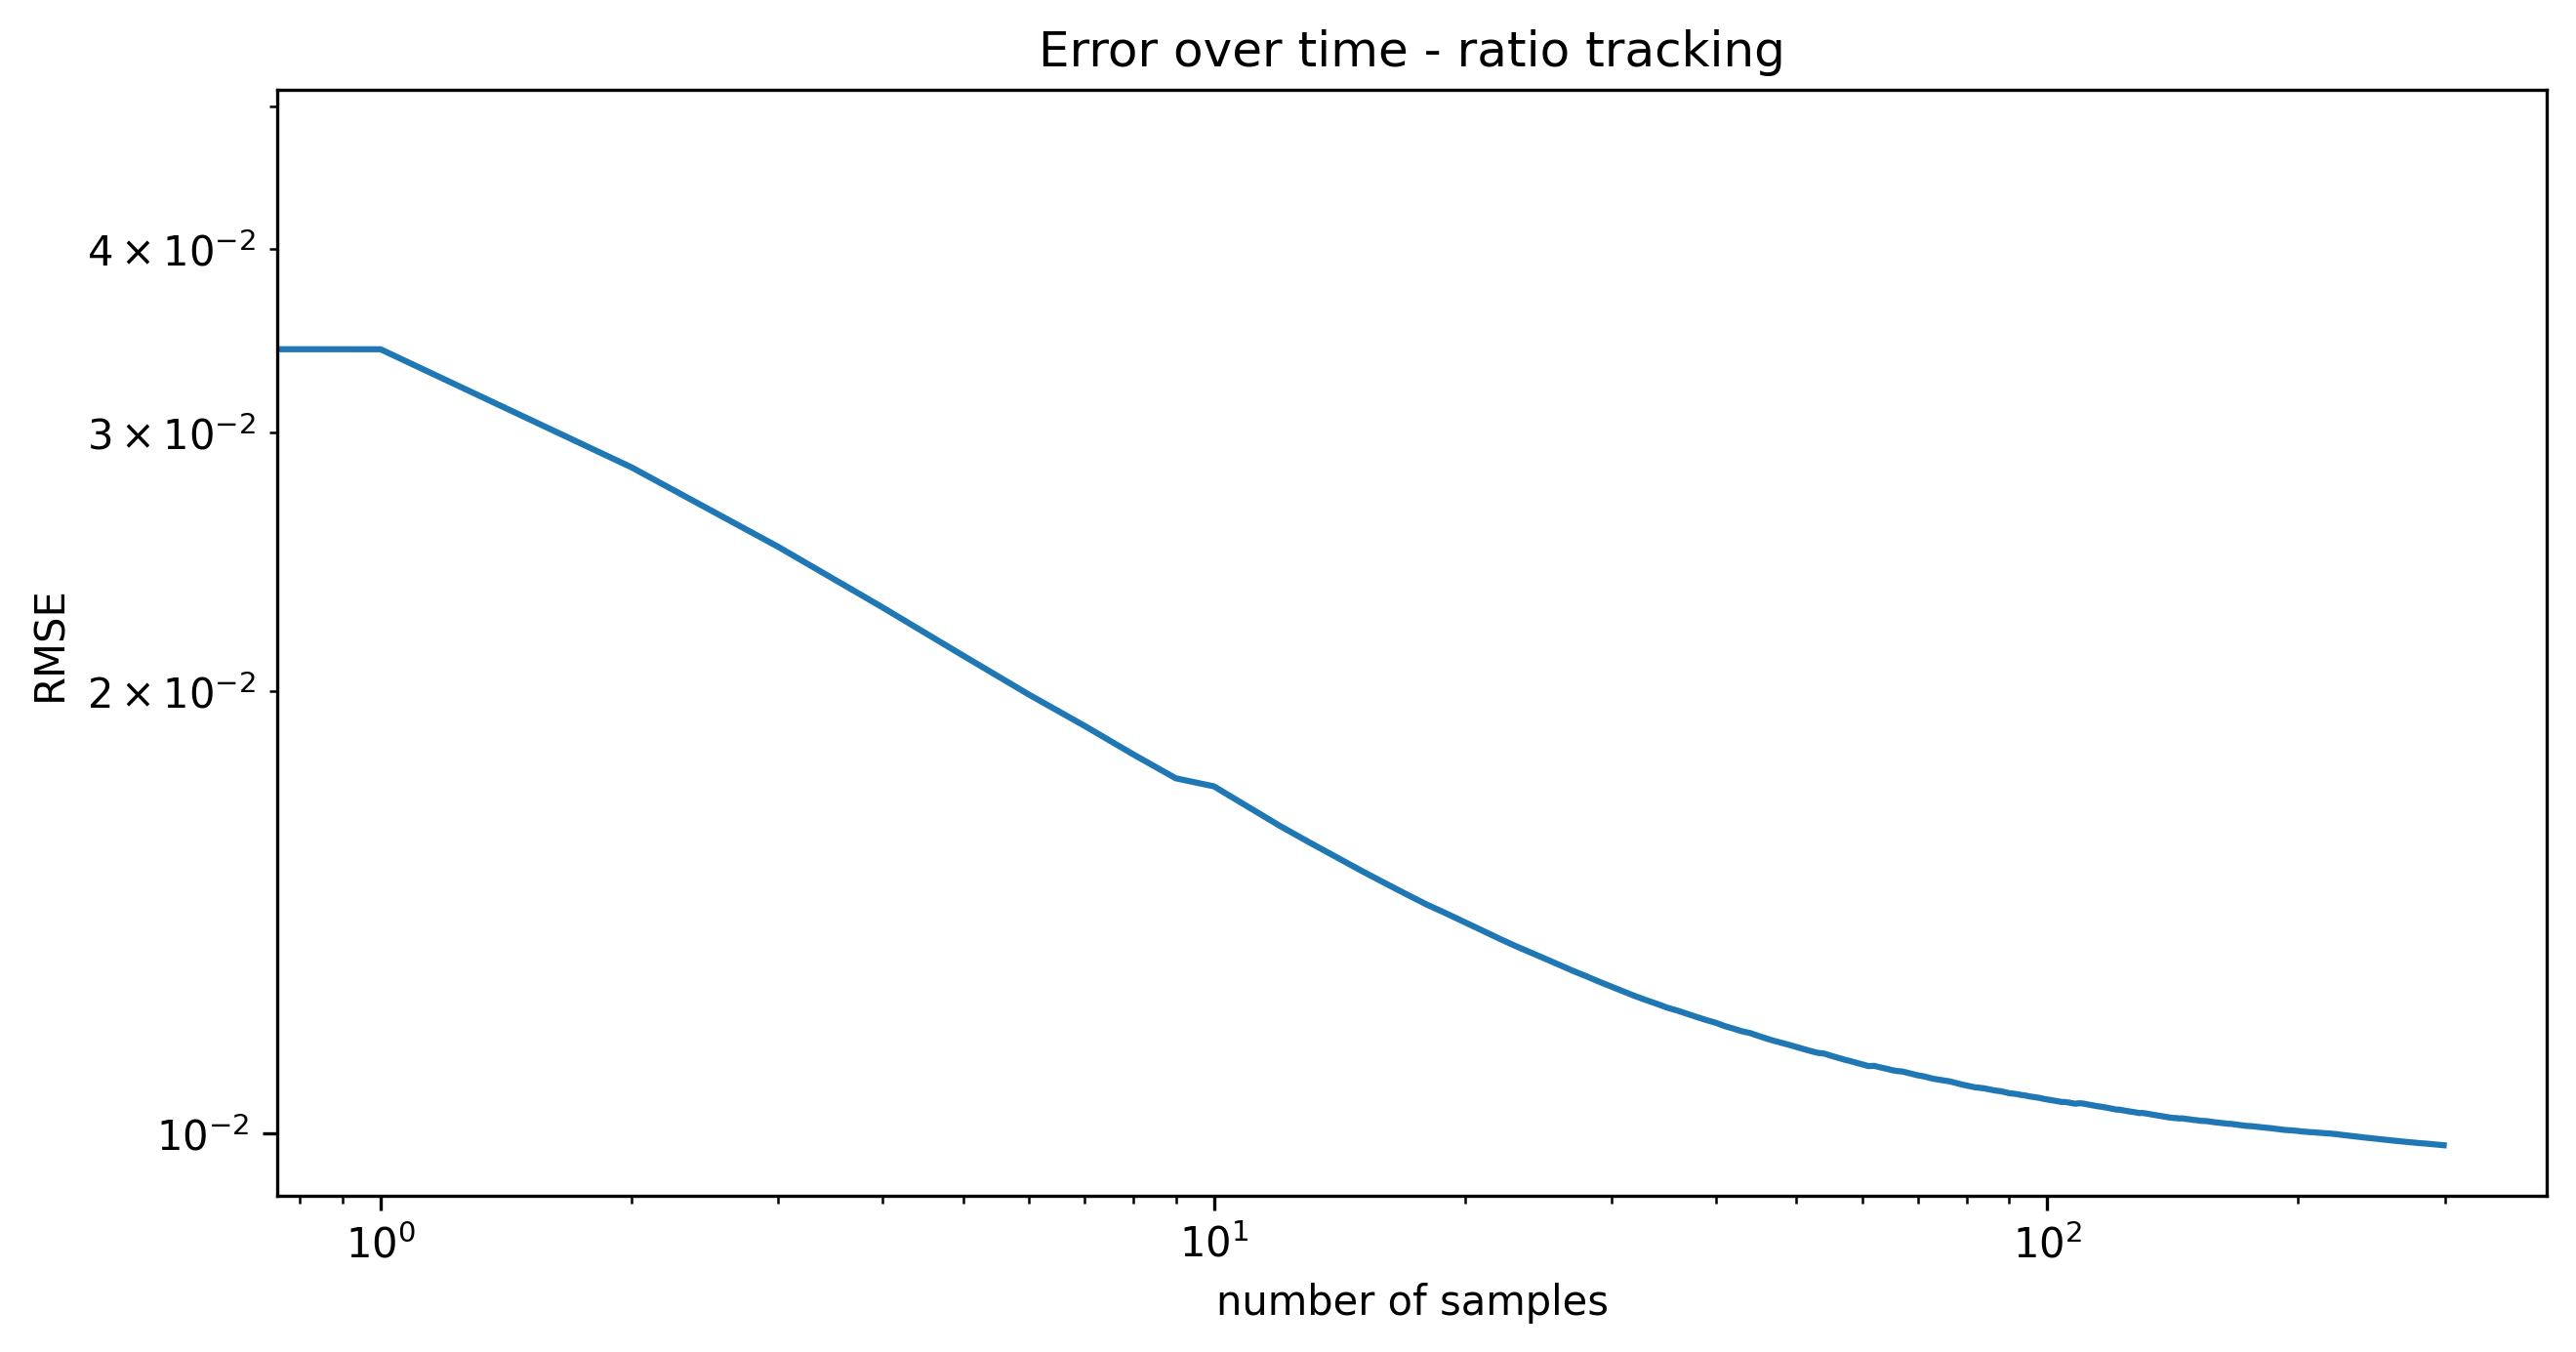

In [316]:
plt.figure(figsize=(10,5), facecolor="white", dpi=300)
plt.plot(errs)
#plt.yscale("log")
plt.ylabel("RMSE")
plt.xlabel("number of samples")
plt.title(f"Error over time - {method.strip('-v')} tracking")


plt.xscale("log")
plt.yscale("log")

#plt.savefig(f"plots/rmse-{method}.png")